# EDA Practica ML

In [46]:
import pandas as pd
import numpy as np
import json 
import operator

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.rcParams["figure.figsize"] = (16,9)

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy import spatial
from collections import Counter
import math

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR

from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

## 1 Cargamos los datos y los juntamos en un solo DF. 

Por algun motivo que desconozco en los csv de Japan, South Korea, Mexico y Russia hay problema de decodificacion con usf-8, he utilizado otro que no da problemas pero no decodifica bien los simbolos, Mexico es el unico que es medio legible asi que es ciertas partes ignoraremos estos paises.

### 1.1 Canada

In [3]:
CAvideos = pd.read_csv("Data/CAvideos.csv")
CAvideosJSON = json.load(open("Data/CA_category_id.json"))
CAvideos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [4]:
cat_dict = {}

for category in CAvideosJSON['items']:
    cat_dict[category['id']] = category['snippet']['title']

Todos los diccionarios de categorias son iguales para cada pais (salvo el de USA), asi que usare el mismo siempre que pueda.

In [5]:
CAvideos = CAvideos[CAvideos["category_id"] != 29]
CAvideos["category_id"] = CAvideos["category_id"].apply(lambda x: cat_dict[str(x)])
CAvideos.rename(columns={"category_id": "category"},inplace=True)
CAvideos = CAvideos.assign(country = "Canada")
CAvideos.head(3)

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Canada
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Canada
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada


### 1.2 Deutschland

In [6]:
DEvideos = pd.read_csv("Data/DEvideos.csv")
DEvideosJSON = json.load(open("Data/DE_category_id.json"))
DEvideos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [7]:
DEvideos = DEvideos[DEvideos["category_id"] != 29]
DEvideos["category_id"] = DEvideos["category_id"].apply(lambda x: cat_dict[str(x)])
DEvideos.rename(columns={"category_id": "category"},inplace=True)
DEvideos = DEvideos.assign(country = "Deutschland")
DEvideos.head(3)

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,Entertainment,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Deutschland
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,Comedy,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Deutschland
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Deutschland


### 1.3 France

In [8]:
FRvideos = pd.read_csv("Data/FRvideos.csv")
FRvideosJSON = json.load(open("Data/FR_category_id.json"))
FRvideos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...


In [9]:
FRvideos = FRvideos[FRvideos["category_id"] != 29]
FRvideos["category_id"] = FRvideos["category_id"].apply(lambda x: cat_dict[str(x)])
FRvideos.rename(columns={"category_id": "category"},inplace=True)
FRvideos = FRvideos.assign(country = "France")
FRvideos.head(3)

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,Entertainment,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,France
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,Entertainment,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,France
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,Comedy,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...,France


### 1.4 Great Britain

In [10]:
GBvideos = pd.read_csv("Data/GBvideos.csv")
GBvideosJSON = json.load(open("Data/GB_category_id.json"))
GBvideos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...


In [11]:
GBvideos = GBvideos[GBvideos["category_id"] != 29]
GBvideos["category_id"] = GBvideos["category_id"].apply(lambda x: cat_dict[str(x)])
GBvideos.rename(columns={"category_id": "category"},inplace=True)
GBvideos = GBvideos.assign(country = "Great Britain")
GBvideos.head(3)

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,Howto & Style,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Great Britain
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,Entertainment,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Great Britain
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Great Britain


### 1.5 India

In [12]:
INvideos = pd.read_csv("Data/INvideos.csv")
INvideosJSON = json.load(open("Data/IN_category_id.json"))
INvideos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...


In [13]:
INvideos = INvideos[INvideos["category_id"] != 29]
INvideos["category_id"] = INvideos["category_id"].apply(lambda x: cat_dict[str(x)])
INvideos.rename(columns={"category_id": "category"},inplace=True)
INvideos = INvideos.assign(country = "India")
INvideos.head(3)

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,India
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,News & Politics,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",India
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,Entertainment,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,India


### 1.6 Japan*

In [14]:
JPvideos = pd.read_csv("Data/JPvideos.csv", encoding='ISO-8859-1')
JPvideosJSON = json.load(open("Data/JP_category_id.json"))
JPvideos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,25,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN


In [15]:
JPvideos = JPvideos[JPvideos["category_id"] != 29]
JPvideos["category_id"] = JPvideos["category_id"].apply(lambda x: cat_dict[str(x)])
JPvideos.rename(columns={"category_id": "category"},inplace=True)
JPvideos = JPvideos.assign(country = "Japan")
JPvideos.head(3)

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,News & Politics,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...,Japan
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,Film & Animation,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN,Japan
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,Science & Technology,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN,Japan


### 1.7 South Korea*

In [16]:
KRvideos = pd.read_csv("Data/KRvideos.csv", encoding='ISO-8859-1')
KRvideosJSON = json.load(open("Data/KR_category_id.json"))
KRvideos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,22,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...
1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...
2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,22,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì


In [17]:
KRvideos = KRvideos[KRvideos["category_id"] != 29]
KRvideos["category_id"] = KRvideos["category_id"].apply(lambda x: cat_dict[str(x)])
KRvideos.rename(columns={"category_id": "category"},inplace=True)
KRvideos = KRvideos.assign(country = "South Korea")
KRvideos.head(3)

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,People & Blogs,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...,South Korea
1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,News & Politics,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...,South Korea
2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,People & Blogs,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì,South Korea


### 1.8 Mexico

In [18]:
MXvideos = pd.read_csv("Data/MXvideos.csv", encoding='ISO-8859-1')
MXvideosJSON = json.load(open("Data/MX_category_id.json"))
MXvideos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...


In [19]:
MXvideos = MXvideos[MXvideos["category_id"] != 29]
MXvideos["category_id"] = MXvideos["category_id"].apply(lambda x: cat_dict[str(x)])
MXvideos.rename(columns={"category_id": "category"},inplace=True)
MXvideos = MXvideos.assign(country = "Mexico")
MXvideos.head(3)

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,Entertainment,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Mexico
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,People & Blogs,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Mexico
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,News & Politics,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,Mexico


### 1.9 Russia*

In [20]:
RUvideos = pd.read_csv("Data/RUvideos.csv", encoding='ISO-8859-1')
RUvideosJSON = json.load(open("Data/RU_category_id.json"))
RUvideos.head(3)        

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,ÐÐ°Ñ Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...,Ð¢âÐ ÐÐÐÐÐ§,22,2017-11-13T09:09:31.000Z,"Ð·Ð°Ñ Ð°Ñ Ð¸ Ð¿Ð¾Ð»Ð¸Ð½Ð°|""ÑÑÐ¸Ð¼ÑÑ ÑÐºÐ...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"ÐÐ½Ð°ÐºÐ¾Ð¼ÑÑÐµÑÑ, ÑÑÐ¾ ÐÐ°Ñ Ð°Ñ Ð¸ Ð..."
1,AOCJIFEA_jE,17.14.11,ÐÐ¸ÑÐ¶Ð° ÐÐµÐ¼Ð¾Ð² #29. ÐÐ¾Ð»ÑÑÐ¾Ð¸Ì Ð²...,Druzhko Show,22,2017-11-13T17:32:11.000Z,"Ð±Ð¸ÑÐ¶Ð° Ð¼ÐµÐ¼Ð¾Ð²|""Ð»ÐµÐ² ÑÐ°Ð³Ð¸Ð½ÑÐ½""|...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,Ð 29 Ð²ÑÐ¿ÑÑÐºÐµ ÐÑÑÐ¶ÐºÐ¾ Ð¨Ð¾Ñ Ð¡ÐµÑ...
2,VAWNQDgwwOM,17.14.11,Ð¥ÐÐÐ ÐÐ­ÐÐ - Ð¡ÐÐÐ Ð¡Ð ÐÐÐ Ð§Ð£Ð...,Ð®Ð»Ð¸Ðº,24,2017-11-13T16:11:31.000Z,"ÑÐ¼Ð¾Ñ|""ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ""|""Ð²Ð»Ð¾Ð³""|""Ð±Ð»Ð¾Ð³...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Ð¤Ð°ÐºÑÐ»ÑÑ...


In [21]:
RUvideos = RUvideos[RUvideos["category_id"] != 29]
RUvideos["category_id"] = RUvideos["category_id"].apply(lambda x: cat_dict[str(x)])
RUvideos.rename(columns={"category_id": "category"},inplace=True)
RUvideos = RUvideos.assign(country = "Russia")
RUvideos.head(3)

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,gDuslQ9avLc,17.14.11,ÐÐ°Ñ Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...,Ð¢âÐ ÐÐÐÐÐ§,People & Blogs,2017-11-13T09:09:31.000Z,"Ð·Ð°Ñ Ð°Ñ Ð¸ Ð¿Ð¾Ð»Ð¸Ð½Ð°|""ÑÑÐ¸Ð¼ÑÑ ÑÐºÐ...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"ÐÐ½Ð°ÐºÐ¾Ð¼ÑÑÐµÑÑ, ÑÑÐ¾ ÐÐ°Ñ Ð°Ñ Ð¸ Ð...",Russia
1,AOCJIFEA_jE,17.14.11,ÐÐ¸ÑÐ¶Ð° ÐÐµÐ¼Ð¾Ð² #29. ÐÐ¾Ð»ÑÑÐ¾Ð¸Ì Ð²...,Druzhko Show,People & Blogs,2017-11-13T17:32:11.000Z,"Ð±Ð¸ÑÐ¶Ð° Ð¼ÐµÐ¼Ð¾Ð²|""Ð»ÐµÐ² ÑÐ°Ð³Ð¸Ð½ÑÐ½""|...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,Ð 29 Ð²ÑÐ¿ÑÑÐºÐµ ÐÑÑÐ¶ÐºÐ¾ Ð¨Ð¾Ñ Ð¡ÐµÑ...,Russia
2,VAWNQDgwwOM,17.14.11,Ð¥ÐÐÐ ÐÐ­ÐÐ - Ð¡ÐÐÐ Ð¡Ð ÐÐÐ Ð§Ð£Ð...,Ð®Ð»Ð¸Ðº,Entertainment,2017-11-13T16:11:31.000Z,"ÑÐ¼Ð¾Ñ|""ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ""|""Ð²Ð»Ð¾Ð³""|""Ð±Ð»Ð¾Ð³...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Ð¤Ð°ÐºÑÐ»ÑÑ...,Russia


### 1.10 United States

In [22]:
USvideos = pd.read_csv("Data/USvideos.csv")
USvideosJSON = json.load(open("Data/US_category_id.json"))
USvideos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [23]:
UScat_dict = {}

for category in USvideosJSON['items']:
    UScat_dict[category['id']] = category['snippet']['title']

Curiosamente, US tiene un diccionario de categorias diferente al del resto, asi que usare este aqui.

In [24]:
USvideos["category_id"] = USvideos["category_id"].apply(lambda x: UScat_dict[str(x)])
USvideos.rename(columns={"category_id": "category"},inplace=True)
USvideos = USvideos.assign(country = "United States")
USvideos.head(3)

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,United States
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",United States
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,United States


### 1.11 Juntamos los DF y Limpiamos los Datos

In [25]:
frames = [CAvideos, DEvideos, FRvideos, GBvideos, INvideos, JPvideos, KRvideos, MXvideos, RUvideos, USvideos]
df = pd.concat(frames, ignore_index=True)

In [26]:
df.head(3)

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Canada
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Canada
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada


Vamos a intentar mantener el EDA relativamente sencillo, asi que no vamos a hacer ningun tratamiento de imagen con los thumbnail.

In [27]:
df.drop(labels='thumbnail_link', axis = 1, inplace=True)

Vamos a sacar de la fecha de trending el mes en el que se hizo popular para comparar, por mes, que categorias o canales han tenido mas exito.

In [27]:
df["trending_month"]= df["trending_date"].apply(lambda x: x.split(".")[2])
df.head(3)

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_month
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Canada,11
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...,Canada,11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada,11


## 2 EDA.

### 2.1 Estudio de las Categorias.

#### 2.1.1 Visitas

Empezaremos viendo cuales son las categorias mas comunes en los videos, es decir, un conteo de cuantos videos hay en cada categoria.

<Axes: >

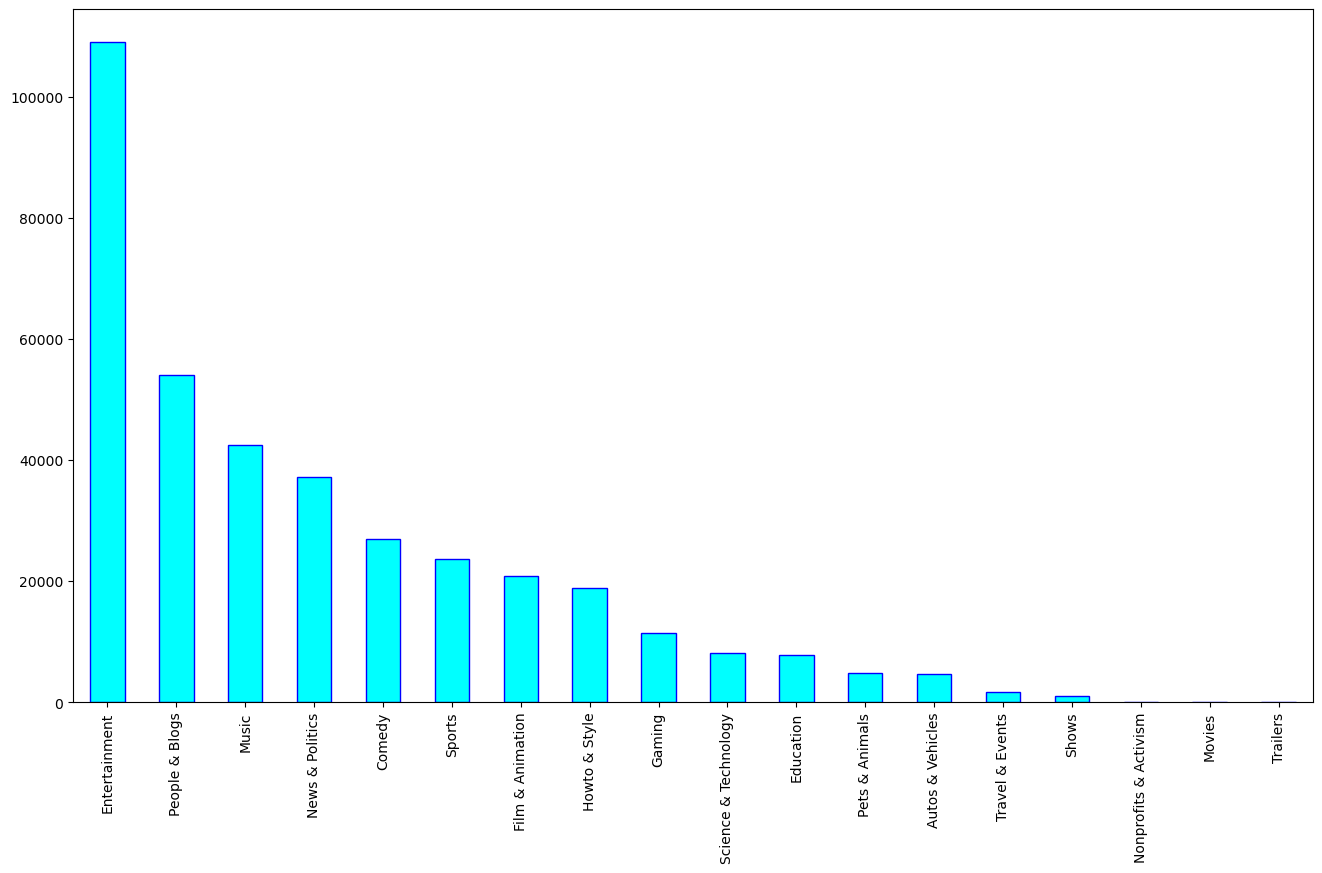

In [28]:
df.category.value_counts(ascending=False).plot.bar(color='cyan',edgecolor='blue')

Podemos apreciar que la mayoria de videos que se suben son de entretenimiento y Blogs, y las que menos videos tienen son trailer, peliculas y activismo. Veamos ahopar la media de visitas de cada categoria en total y por mes.

<Axes: xlabel='category'>

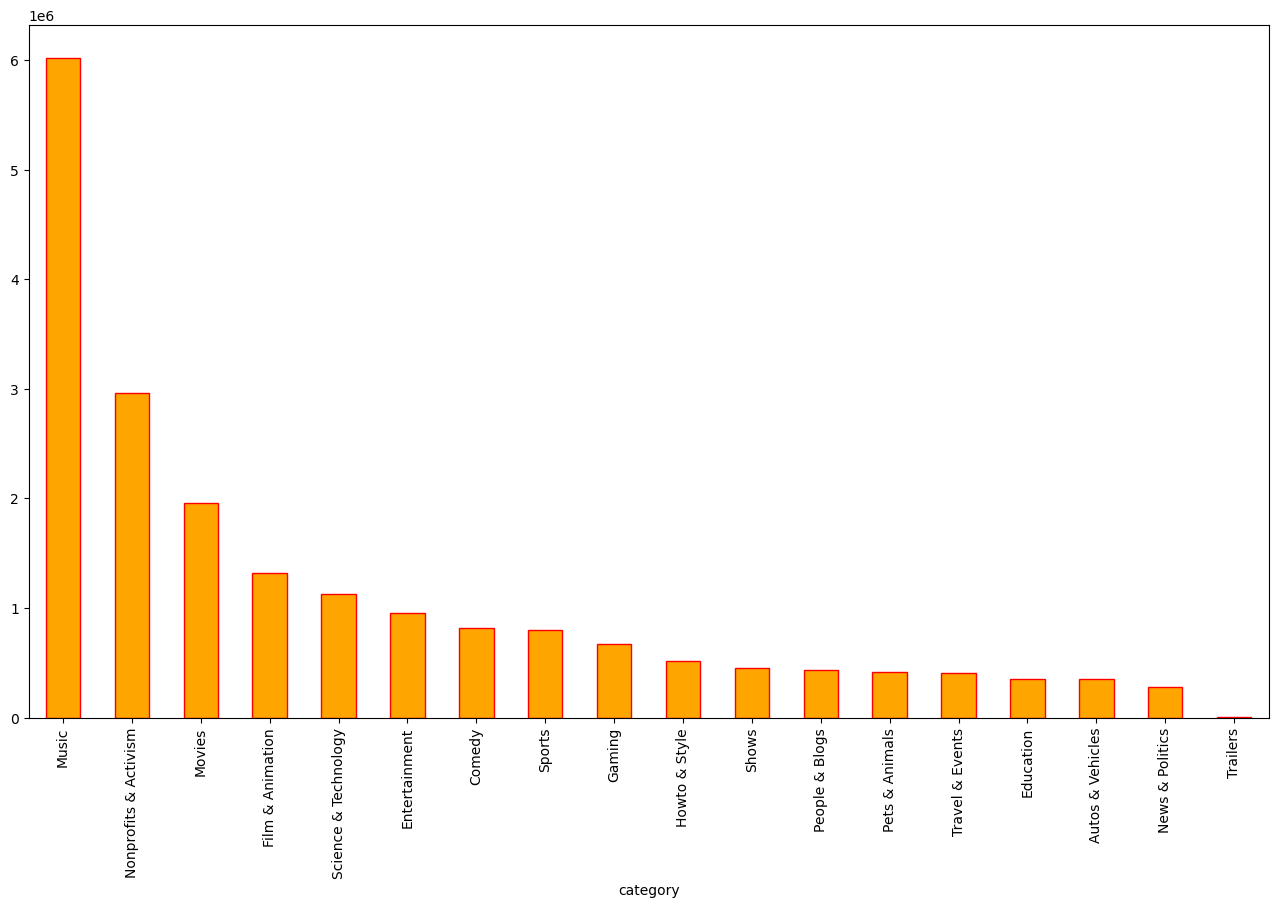

In [29]:
df.groupby('category')['views'].mean().sort_values(ascending=False).plot.bar(color='orange',edgecolor='red')

Queda en evidencia que el contenido mas reproducido es la musica, seguida de activismo y peliculas, lo cual contrasta fuertemente con lo visto en el grafico enterior ya que categorias con muy pocos videos tienen muchas visitas. Mientras que la mayoria de categorias se mantienen en una media similar, los trailers apenas son vistos.

In [30]:
viewsdict = df.groupby(['trending_month','category'])['views'].mean().to_dict()

In [31]:
month11 = {}
month12 = {}
month01 = {}
month02 = {}
month03 = {}
month04 = {}
month05 = {}
month06 = {}

for key in viewsdict:
    if '01' in key:
        month01[key[1]] = viewsdict[key]
    if '02' in key:
        month02[key[1]] = viewsdict[key]
    if '03' in key:
        month03[key[1]] = viewsdict[key]
    if '04' in key:
        month04[key[1]] = viewsdict[key]
    if '05' in key:
        month05[key[1]] = viewsdict[key]
    if '06' in key:
        month06[key[1]] = viewsdict[key]
    if '11' in key:
        month11[key[1]] = viewsdict[key]
    if '12' in key:
        month12[key[1]] = viewsdict[key]


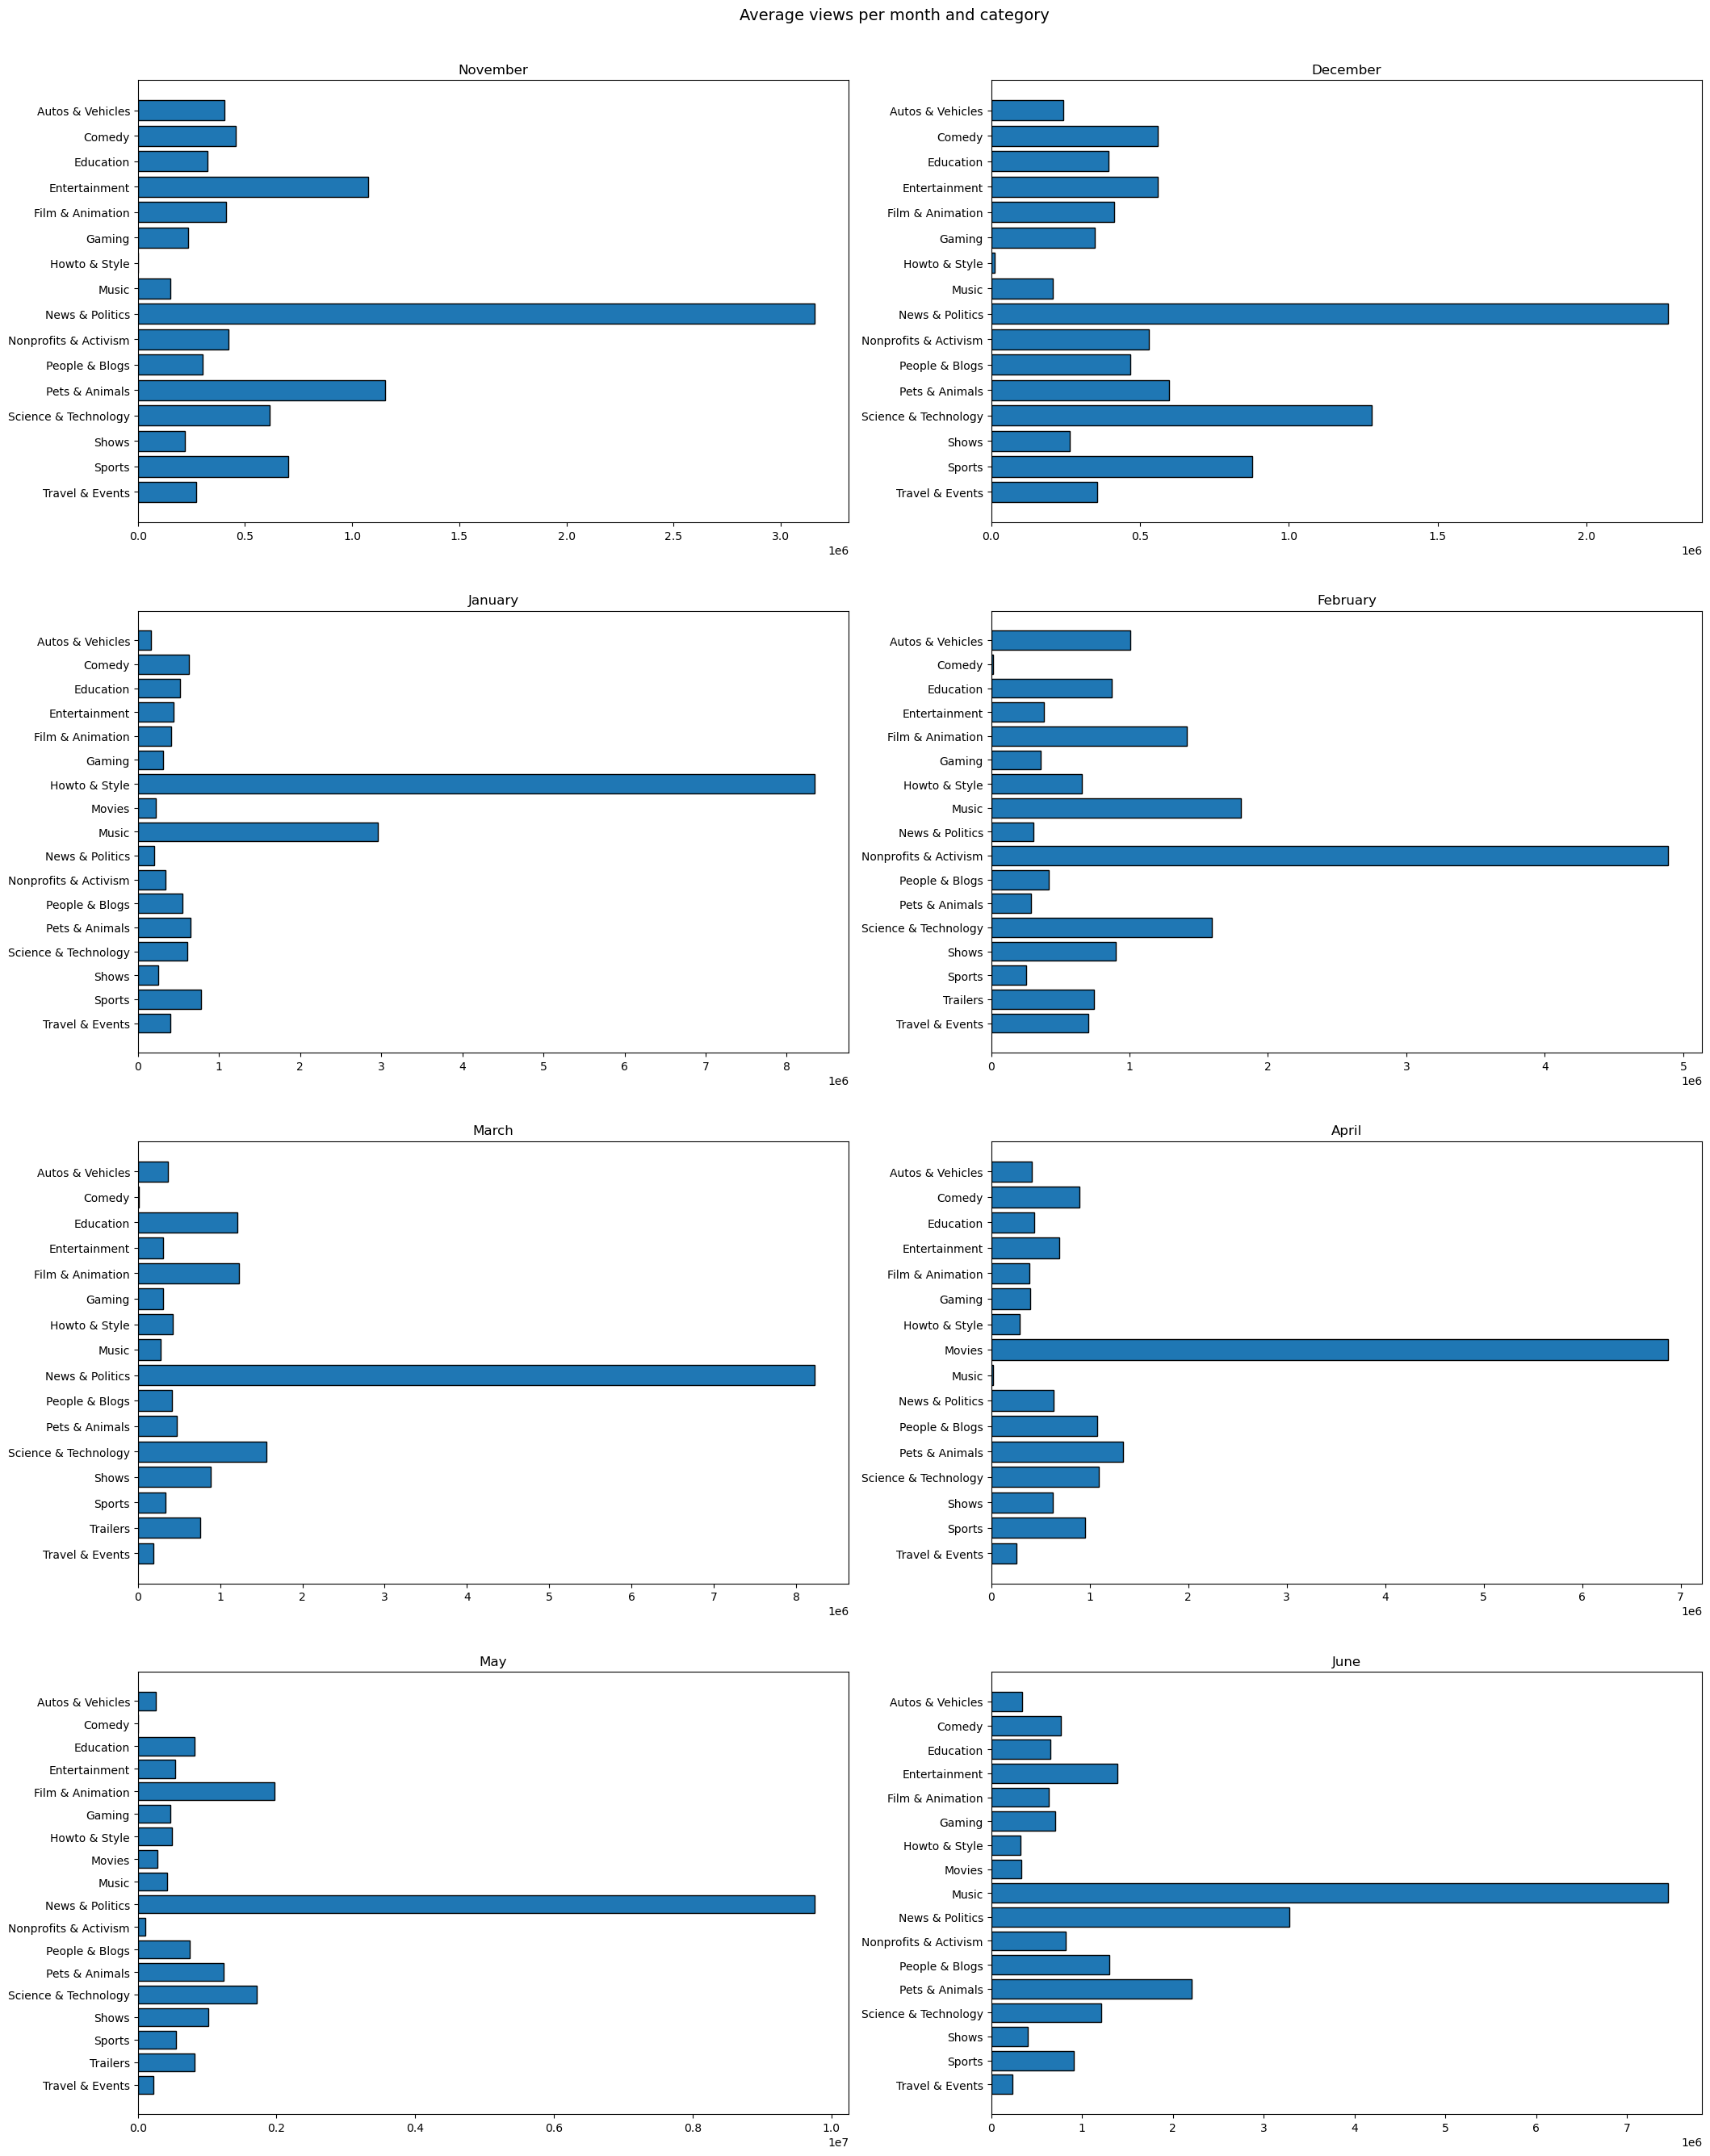

In [32]:
figure, axs = plt.subplots(4, 2,figsize=(25,30))
figure.suptitle("Average views per month and category",fontsize=14)
figure.subplots_adjust(top=0.95)

axs[0,0].barh(sorted(month11.keys(), reverse=True), list(month11.values()), align='center', edgecolor='black')
axs[0,0].set_title("November")

axs[0,1].barh(sorted(month12.keys(), reverse=True), list(month12.values()), align='center', edgecolor='black')
axs[0,1].set_title("December")

axs[1,0].barh(sorted(month01.keys(), reverse=True), list(month01.values()), align='center', edgecolor='black')
axs[1,0].set_title("January")

axs[1,1].barh(sorted(month02.keys(), reverse=True), list(month02.values()), align='center', edgecolor='black')
axs[1,1].set_title("February")

axs[2,0].barh(sorted(month03.keys(), reverse=True), list(month03.values()), align='center', edgecolor='black')
axs[2,0].set_title("March")

axs[2,1].barh(sorted(month04.keys(), reverse=True), list(month04.values()), align='center', edgecolor='black')
axs[2,1].set_title("April")

axs[3,0].barh(sorted(month05.keys(), reverse=True), list(month05.values()), align='center', edgecolor='black')
axs[3,0].set_title("May")

axs[3,1].barh(sorted(month06.keys(), reverse=True), list(month06.values()), align='center', edgecolor='black')
axs[3,1].set_title("June")

plt.show()

Podemos ir viendo como fluctuan las visitas segun pasan los meses de acuerdo (probablemente) a eventos que cambian la atencion del publico: estrenos de peliculas, noticias de politica, etc. Por ejemplo la categoria music tuvo en junio muchas visitas porque fue cuando la cancion 'Despacito' empezo a escucharse por todo el mundo.

#### 2.1.2 Likes.

Veamos ahora que categorias atraen mas likes y cuales mas dislikes.

In [33]:
df_likes = df[["category", 'likes', 'dislikes']].copy()

df_likes.rename({'category':'Most Liked Categories'},axis='columns',inplace=True)
display(df_likes.groupby('Most Liked Categories').mean().sort_values('likes',ascending=False).loc[:,'likes'].head(5))

df_likes.rename({'Most Liked Categories':'Most Disiked Categories'},axis='columns',inplace=True)
display(df_likes.groupby('Most Disiked Categories').mean().sort_values('dislikes',ascending=False).loc[:,'dislikes'].head(5))

Most Liked Categories
Nonprofits & Activism    259923.614035
Music                    169995.729101
Comedy                    40096.130664
Science & Technology      30910.649982
Film & Animation          28181.042901
Name: likes, dtype: float64

Most Disiked Categories
Nonprofits & Activism    58076.859649
Music                     6930.842052
Entertainment             2277.584188
Gaming                    1698.936685
Comedy                    1509.022358
Name: dislikes, dtype: float64

Como cabria esperar, el activismo es lo que mas impulsa a la gente a interaccionar con el video, ya que es lo que mas mueve sentimentalment a la gente y eso impulsa la implicacion.

### 2.2 Estudio de los Tags.

Vamos a estudiar los tags mas usados en todo el mundo y por paises, ignorando aquellos paises que no se han podido leer bien (Japan, South Korea and Russia. Mexico lo vamos a dejar porque algunas palabras si se pueden leer, el fallo es solo con los acentos).

In [34]:
tagslist = []

for i in df.index:
    if df['country'][i] not in ["Japan", 'South Korea', 'Russia']:
        tagslist.append(df['tags'][i].split("|"))

flat_taglist = [item for sublist in tagslist for item in sublist]
unique_string=(" ").join(flat_taglist)

# Canada
tagslist_CA = []

for i in df.index:
    if df['country'][i] == "Canada":
        tagslist_CA.append(df['tags'][i].split("|"))

flat_taglist_CA = [item for sublist in tagslist_CA for item in sublist]
unique_string_CA=(" ").join(flat_taglist_CA)

# Deutschland
tagslist_DE = []

for i in df.index:
    if df['country'][i] == "Deutschland":
        tagslist_DE.append(df['tags'][i].split("|"))

flat_taglist_DE = [item for sublist in tagslist_DE for item in sublist]
unique_string_DE=(" ").join(flat_taglist_DE)

# France
tagslist_FR = []

for i in df.index:
    if df['country'][i] == "France":
        tagslist_FR.append(df['tags'][i].split("|"))

flat_taglist_FR = [item for sublist in tagslist_FR for item in sublist]
unique_string_FR=(" ").join(flat_taglist_FR)

# Great Britain
tagslist_GR = []

for i in df.index:
    if df['country'][i] == "Great Britain":
        tagslist_GR.append(df['tags'][i].split("|"))

flat_taglist_GR = [item for sublist in tagslist_GR for item in sublist]
unique_string_GR=(" ").join(flat_taglist_GR)

# India
tagslist_IN = []

for i in df.index:
    if df['country'][i] == "India":
        tagslist_IN.append(df['tags'][i].split("|"))

flat_taglist_IN = [item for sublist in tagslist_IN for item in sublist]
unique_string_IN=(" ").join(flat_taglist_IN)

# Mexico
tagslist_MX = []

for i in df.index:
    if df['country'][i] == "Mexico":
        tagslist_MX.append(df['tags'][i].split("|"))

flat_taglist_MX = [item for sublist in tagslist_MX for item in sublist]
unique_string_MX=(" ").join(flat_taglist_MX)

# United States
tagslist_US = []

for i in df.index:
    if df['country'][i] == "United States":
        tagslist_US.append(df['tags'][i].split("|"))

flat_taglist_US = [item for sublist in tagslist_US for item in sublist]
unique_string_US=(" ").join(flat_taglist_US)

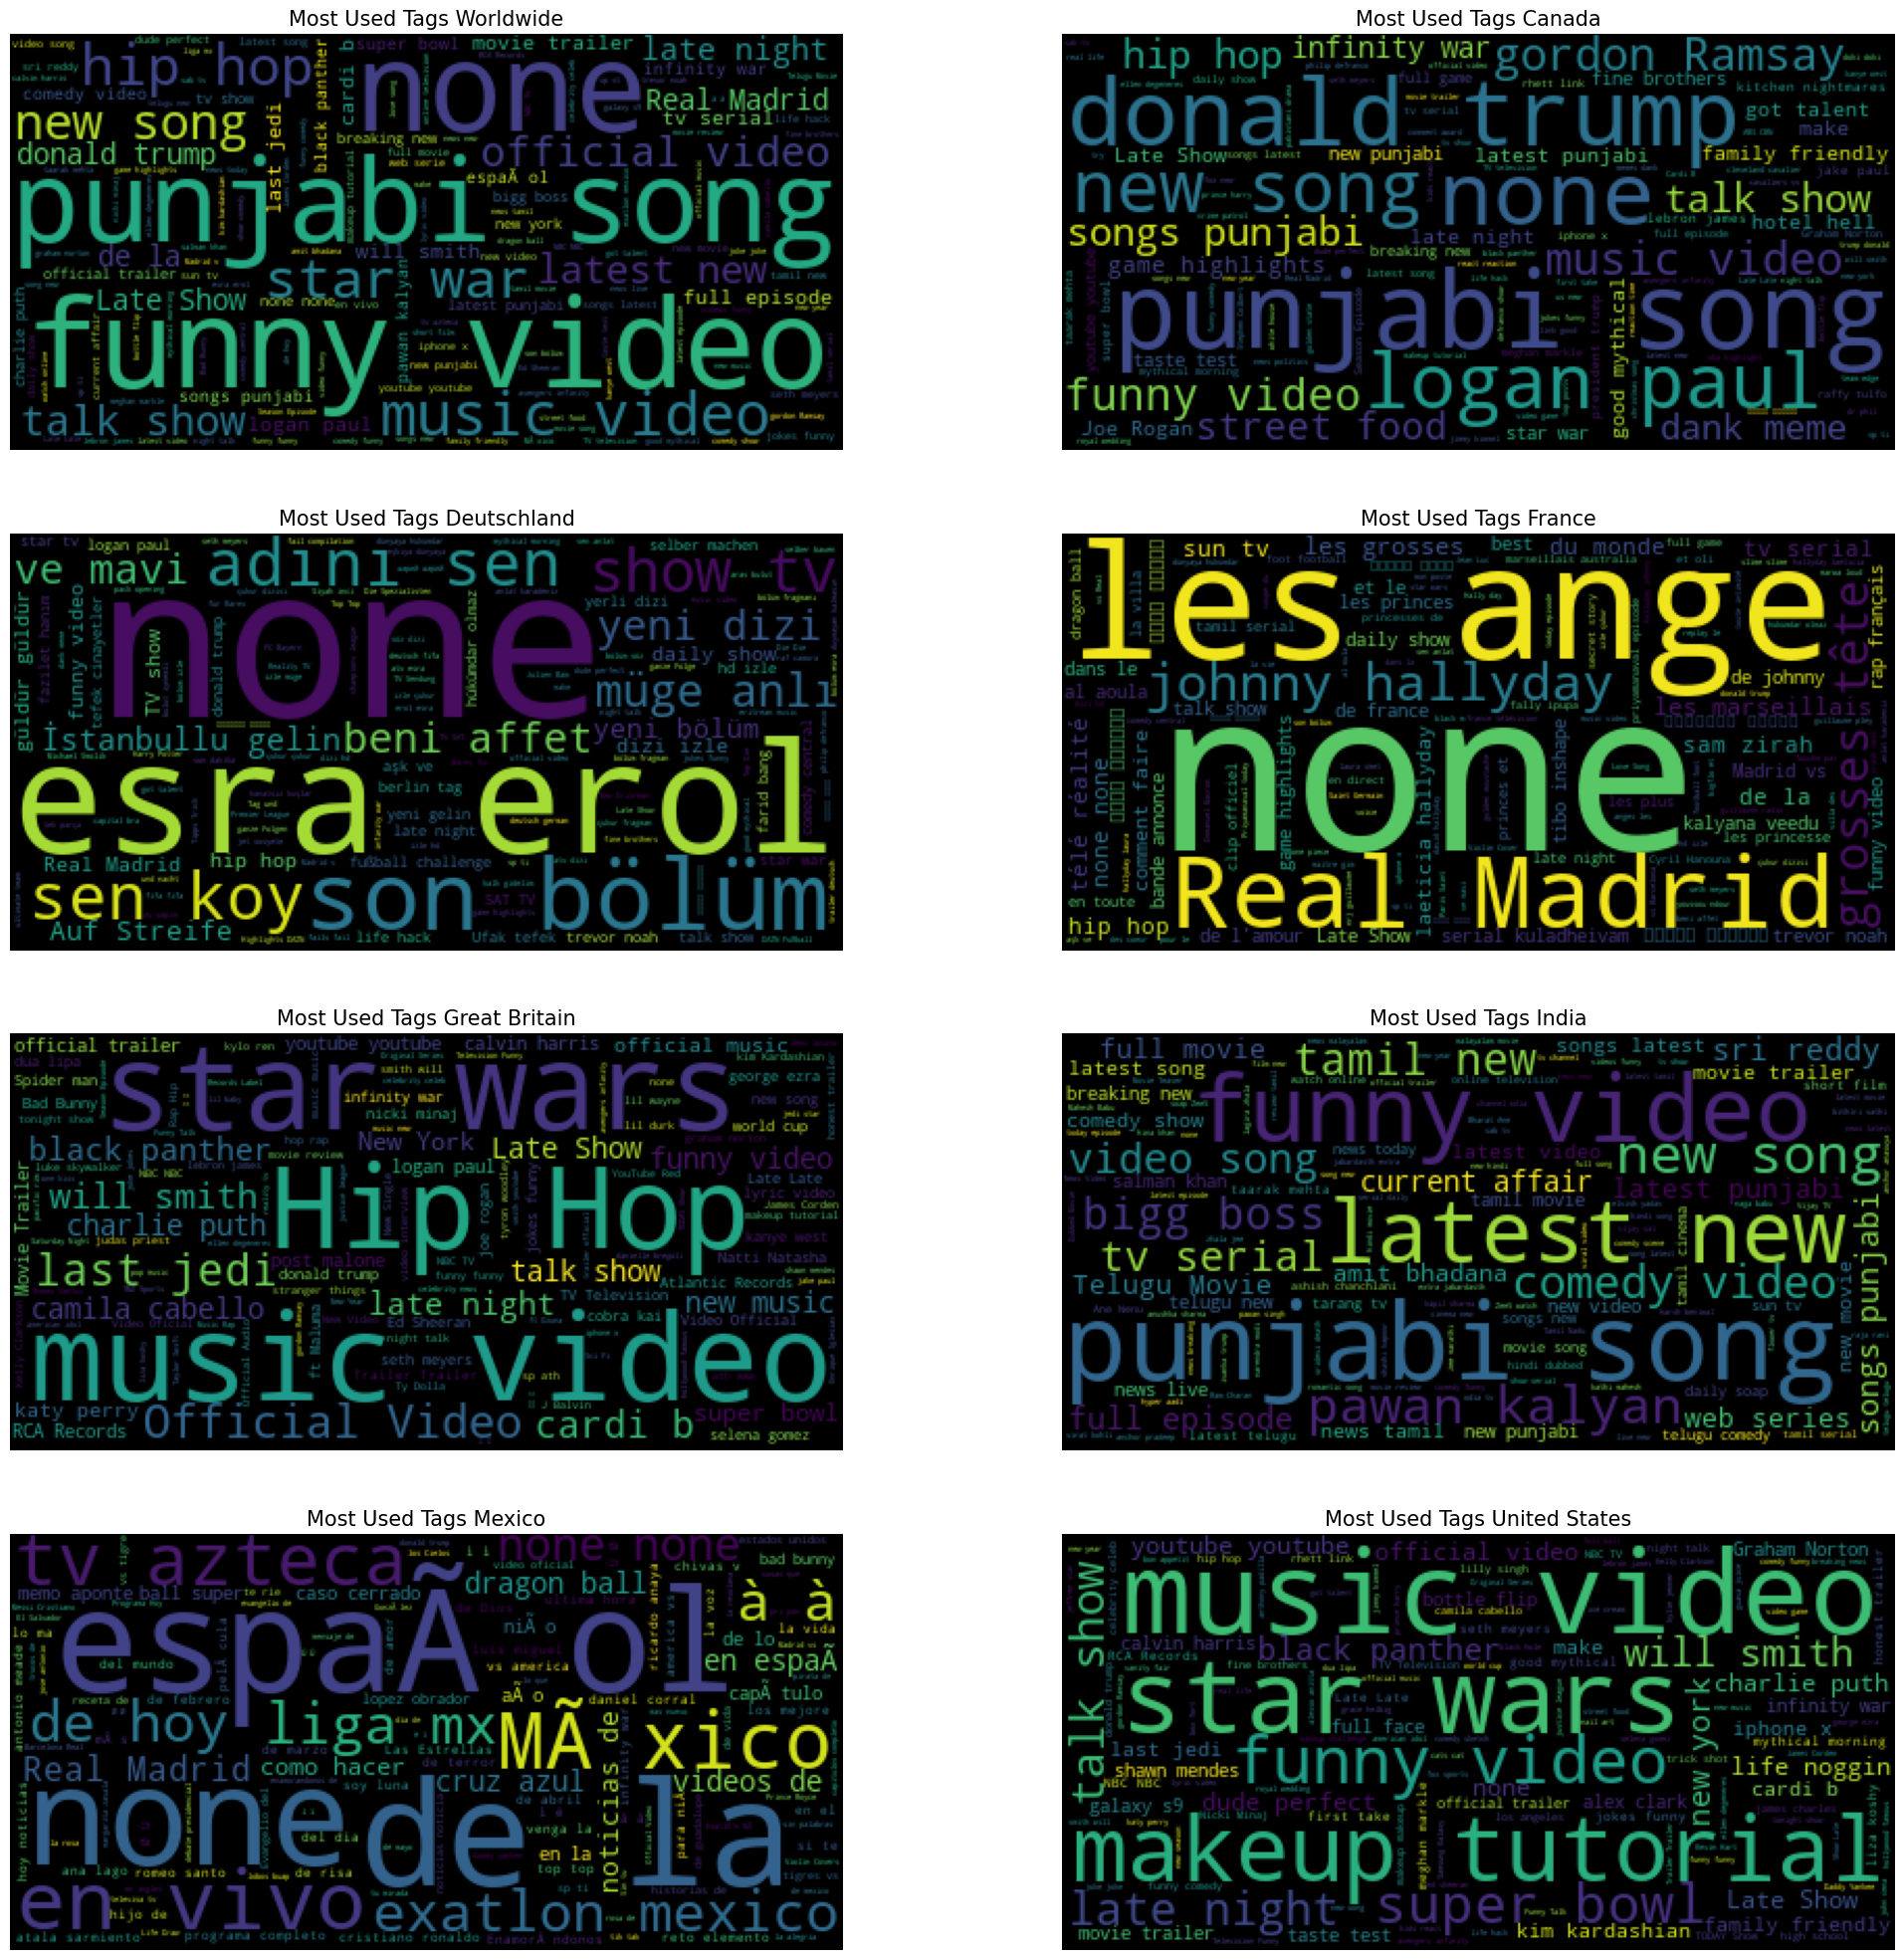

In [35]:
fig = plt.figure(figsize=(25,25))

axis = fig.add_subplot(4,2,1)
wordcloud = WordCloud().generate(unique_string)
axis.imshow(wordcloud)
axis.set_title("Most Used Tags Worldwide", fontsize= 15)
axis.axis("off")

axis = fig.add_subplot(4,2,2)
wordcloud_CA = WordCloud().generate(unique_string_CA)
axis.imshow(wordcloud_CA)
axis.set_title("Most Used Tags Canada", fontsize= 15)
axis.axis("off")

axis = fig.add_subplot(4,2,3)
wordcloud_DE = WordCloud().generate(unique_string_DE)
axis.imshow(wordcloud_DE)
axis.set_title("Most Used Tags Deutschland", fontsize= 15)
axis.axis("off")

axis = fig.add_subplot(4,2,4)
wordcloud_FR = WordCloud().generate(unique_string_FR)
axis.imshow(wordcloud_FR)
axis.set_title("Most Used Tags France", fontsize= 15)
axis.axis("off")

axis = fig.add_subplot(4,2,5)
wordcloud_GR = WordCloud().generate(unique_string_GR)
axis.imshow(wordcloud_GR)
axis.set_title("Most Used Tags Great Britain", fontsize= 15)
axis.axis("off")

axis = fig.add_subplot(4,2,6)
wordcloud_IN = WordCloud().generate(unique_string_IN)
axis.imshow(wordcloud_IN)
axis.set_title("Most Used Tags India", fontsize= 15)
axis.axis("off")

axis = fig.add_subplot(4,2,7)
wordcloud_MX = WordCloud().generate(unique_string_MX)
axis.imshow(wordcloud_MX)
axis.set_title("Most Used Tags Mexico", fontsize= 15)
axis.axis("off")

axis = fig.add_subplot(4,2,8)
wordcloud_US = WordCloud().generate(unique_string_US)
axis.imshow(wordcloud_US)
axis.set_title("Most Used Tags United States", fontsize= 15)
axis.axis("off")

plt.show()

Podemos ver que en general "Punjabi", "Song", "Music Video", "Funny" parecen ser los tags mas usados.

### 2.3 Estudio de los Canales.

Vamos a estudiar cuales son los canales con mejor ratio de likes-dislikes, ignorando, de nuevo, los paises donde no se pude hacer una buena codificacion. Para ello crearemos una nueva columna dentro de un nuevo dataframe mejor adaptado.

In [36]:
frames2 = [CAvideos, DEvideos, FRvideos, GBvideos, INvideos, MXvideos, USvideos]
df_good = pd.concat(frames2, ignore_index=True)

In [37]:
df_canal = df_good[['channel_title','likes','dislikes','comment_count','comments_disabled']].copy()

In [38]:
df_canal['ratio'] = df_canal['likes']-df_canal['dislikes']

df_canal.rename({'channel_title':'Best Ratio Channel'},axis='columns',inplace=True)
display(df_canal.groupby('Best Ratio Channel').mean().sort_values('ratio',ascending=False).loc[:,'ratio'].head(5).map('{:,.2f}'.format))

df_canal.rename({'Best Ratio Channel':'Worst Ratio Channel'},axis='columns',inplace=True)
display(df_canal.groupby('Worst Ratio Channel').mean().sort_values('ratio',ascending=True).loc[:,'ratio'].head(5).map('{:,.2f}'.format))

df_canal.rename({'Worst Ratio Channel':'channel_title'},axis='columns',inplace=True)

Best Ratio Channel
ChildishGambinoVEVO    3,209,065.57
ibighit                2,376,645.43
Bad Bunny              2,128,068.00
DrakeVEVO              1,985,208.49
ArianaGrandeVevo       1,745,054.82
Name: ratio, dtype: object

Worst Ratio Channel
Daily Caller            -211,720.40
UNA SOLA FUERZA         -106,312.00
Roy Moore for Senate     -51,663.86
FACE                     -44,590.00
MOMENT CRAZY             -33,197.00
Name: ratio, dtype: object

Ahora vamos a mirar si tener muchos comentarios influye en el ratio de likes-dislikes. Para ello vamos a eliminar primero los videos que tienen desactivados los comentarios.

In [39]:
df_canal = df_canal[df_canal['comments_disabled'] == False].copy(deep = True)
df_canal.drop(columns=['channel_title','likes','dislikes','comments_disabled'])

,comment_count,ratio
0,125882,744005
1,13030,126106
2,8181,140696
3,17518,130250
4,85067,1613048
...,...,...
279217,2657,36775
279218,3936,59626
279219,3992,47036
279220,13088,190111


In [40]:
corr = df_canal['comment_count'].corr(df_canal['ratio'])

print("Como el valor de correlacion de Pearson es de {:.2f}, quiere decir que si que vas a tener mejor ratio de likes si tienes mas comentarios.".format(corr))

Como el valor de correlacion de Pearson es de 0.73, quiere decir que si que vas a tener mejor ratio de likes si tienes mas comentarios.


## 3 Tecnicas de Modelizacion.

### 3.0 Preprocesamiento.

Vamos a empezar por preparar y dividir los datos para los modelos. Como parte de los datos han salido corruptos, vamos a optar por ignorar los datos de Japan, South Korea, Mexico y  Rusia ya que son ilegibles en las categorias cruciales ('category'). Vamos a eliminar las columnas que tienen texto y, como los tags son demasiados (+500 000 valores unicos), no vamos a poder hacer un 'get_dummies', asi que nos desharemos de ellos tambien.

In [39]:
frames_clean = [CAvideos, DEvideos, FRvideos, GBvideos, INvideos, USvideos]
df_clean = pd.concat(frames_clean, ignore_index=True)
df_clean.drop(labels=['thumbnail_link','trending_date','publish_time','title','description','video_id', 'tags'], axis = 1, inplace=True)

df_clean.head(3)

,channel_title,category,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,country
0,EminemVEVO,Music,17158579,787425,43420,125882,False,False,False,Canada
1,iDubbbzTV,Comedy,1014651,127794,1688,13030,False,False,False,Canada
2,Rudy Mancuso,Comedy,3191434,146035,5339,8181,False,False,False,Canada


Y ahora vamos a convertir las variables categoricas en numeros.

In [40]:
categorical_col = []
for column in df_clean.columns:
    if (df_clean[column].dtype == object or df_clean[column].dtype == bool) and column not in ['tag_list']:
        categorical_col.append(column)
        print(f"{column} : {df_clean[column].unique()}")
        print("====================================")

channel_title : ['EminemVEVO' 'iDubbbzTV' 'Rudy Mancuso' ... 'Ben Kronengold'
 'All Def Digital' 'How It Should Have Ended']
category : ['Music' 'Comedy' 'Entertainment' 'News & Politics' 'People & Blogs'
 'Howto & Style' 'Film & Animation' 'Science & Technology' 'Gaming'
 'Sports' 'Pets & Animals' 'Travel & Events' 'Autos & Vehicles'
 'Education' 'Shows' 'Movies' 'Trailers' 'Nonprofits & Activism']
comments_disabled : [False  True]
ratings_disabled : [False  True]
video_error_or_removed : [False  True]
country : ['Canada' 'Deutschland' 'France' 'Great Britain' 'India' 'United States']


In [41]:
label = LabelEncoder()
for column in categorical_col:
    label.fit(df_clean[column])
    df_clean[column] = label.transform(df_clean[column])

In [42]:
df_clean.head(3)

,channel_title,category,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,country
0,4093,8,17158579,787425,43420,125882,0,0,0,0
1,16134,1,1014651,127794,1688,13030,0,0,0,0
2,11777,1,3191434,146035,5339,8181,0,0,0,0


Por ultimo definimos funciones que nos permitan imprimir los scores de cada metodos en las diferentes secciones.

In [32]:
def print_score_cla(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [33]:
def print_score_reg(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print(f"Accuracy Score: {clf.score(X_train, y_train) * 100:.2f}%")
        print("================================================")
        
    elif train==False:
        print("Test Result:\n")
        print(f"Accuracy Score: {clf.score(X_test, y_test) * 100:.2f}%") 
        print("================================================")     

Ahora ya estamos listos para aplicar los modelos.

### 3.1 Clasificacion.

En esta seccion queremos obtener la categoria del video.

In [34]:
X = df_clean.drop('category', axis=1)
y = df_clean.category

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 3.1.1 Decision Tree Classifier.

Primero vamos a probar con un arbol de decision, luego haremos el autoajuste de los hipervalores.

In [35]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

best_params = tree_clf.get_params()
print(f"Best paramters: {best_params}")

print_score_cla(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score_cla(tree_clf, X_train, y_train, X_test, y_test, train=False)

Best paramters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0        1       2        3       4       5       6     7  \
precision     1.0      1.0     1.0      1.0     1.0     1.0     1.0   1.0   
recall        1.0      1.0     1.0      1.0     1.0     1.0     1.0   1.0   
f1-score      1.0      1.0     1.0      1.0     1.0     1.0     1.0   1.0   
support    1729.0  13495.0  4086.0  51957.0  9257.0  4880.0  9176.0  27.0   

                 8        9  ...       11      12      13     14       15  \
precision      1.0      1.0  ...      1.0     1.0     1.0    1.0      1.0   
recall         1.0      1.0  ...      1.0     1.0     1.0 

C:\Users\nekom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nekom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nekom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Obtenemos un resultado de 100% en el train y un 74.44% en el test con los parametros: 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'. A ver cuanto lo podemos mejorar ajustando los hiperparamteros

In [ ]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params}")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score_cla(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score_cla(tree_clf, X_train, y_train, X_test, y_test, train=False)

Con los mejores parametros obtenidos ('criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best') hemos conseguido una accuracy score de 91.09% en train y 75.78% en test.

#### 3.1.2 Random Forest Classifier.

Mismo proceso que antes, ahora con el Random Forest Classifier.

In [36]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

best_params = rf_clf.get_params()
print(f"Best paramters: {best_params}")

print_score_cla(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score_cla(rf_clf, X_train, y_train, X_test, y_test, train=False)

Best paramters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0        1       2        3       4       5       6     7  \
precision     1.0      1.0     1.0      1.0     1.0     1.0     1.0   1.0   
recall        1.0      1.0     1.0      1.0     1.0     1.0     1.0   1.0   
f1-score      1.0      1.0     1.0      1.0     1.0     1.0     1.0   1.0   
support    1729.0  13495.0  4086.0  51957.0  9257.0  4880.0  9176.0  27.0   

                 8        9  ...       11      12      13     14       15  \
precision      1.0 

C:\Users\nekom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nekom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nekom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Un 100% de exito en train, ahora con un 76.44% en test con parametros: 'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False. Veamos el ajuste a donde llega.

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score_cla(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score_cla(rf_clf, X_train, y_train, X_test, y_test, train=False)

En este caso los mejores parametros han sido: 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True y con esos obtenemos una accuracy score de 99.68% en train y 75.85% en test. Vamos ahora a usar el Grid Search para determinar bien los parametros mas buenos.

In [ ]:
n_estimators = [100, 150, 200, 250]
max_features = ['auto', 'sqrt']
max_depth = [25, 30, 35]
min_samples_split = [2, 5, 7]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score_cla(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score_cla(rf_clf, X_train, y_train, X_test, y_test, train=False)

Con los parametros: 'bootstrap': True, 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100; hemos obtenido un 99.88% en train y un 75.88% en test.

#### 3.1.3 Multilayer Perceptron.

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100),activation='relu', solver='adam', alpha=0.001, batch_size='auto', 
                    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=2000, 
                    shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False, 
                    momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=200)

clf.fit(X_train, y_train)
print_score_cla(clf, X_train, y_train, X_test, y_test, train=True)
print_score_cla(clf, X_train, y_train, X_test, y_test, train=False)

Con una accuracy del 33.84%, claramente este no ha sido el mejor metodo.

#### 3.1.4 Logistic Regresion.

In [ ]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)

print_score_cla(logisticRegr, X_train, y_train, X_test, y_test, train=True)
print_score_cla(logisticRegr, X_train, y_train, X_test, y_test, train=False)

Con un score de 34.12% no merece la pena la visualizacion de la matriz de confusion.

#### 3.1.5 KNN.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

print_score_cla(knn, X_train, y_train, X_test, y_test, train=True)
print_score_cla(knn, X_train, y_train, X_test, y_test, train=False)

Vamos a ir variando la cantidad de vecinos en cada caso.

In [ ]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [ ]:
plt.plot(k_range, scores,'k')
plt.xlabel('Values of K')
plt.ylabel('Accuracy')

Como en ningun caso superaria el 60% de accuracy, no nos molestaremos en seguir con este metodo.

#### 3.1.6 SVM.

Usaremos la version LinearSVC pues es mas eficiente cuando el volumen de datos es muy grande, como es nuestro caso.

In [ ]:
clf = LinearSVC(random_state=42, max_iter=100000)
clf.fit(X_train, y_train)

print_score_cla(clf, X_train, y_train, X_test, y_test, train=True)
print_score_cla(clf, X_train, y_train, X_test, y_test, train=False)

Train Result: Accuracy Score: 0.15% <br>
Test Result: Accuracy Score: 0.14% <br>
Con unos resultados tan nefastos y habiendo sido de los mas costosos en tiempo de ejecucion, podemos dejar este metodo como fallido. Vamos a probar con SVC con kernel rbf por si fuera mejor.

In [ ]:
clf = SVC(kernel='rbf', gamma="auto", max_iter=5000)
clf.fit(X_train, y_train)

print_score_cla(clf, X_train, y_train, X_test, y_test, train=True)
print_score_cla(clf, X_train, y_train, X_test, y_test, train=False)

Tras varias pruebas, un 45.39% en train y un 12.74% en test dejan en evidencia que este metodo no es optimo para este problema, sencillamente hay demasiada diferencia entre el train y el test. Quiza un StandardScaler podria ayudar a que se emparejen, pero siendo los scores tan bajos no es algo que merezca la pena.

#### 3.1.7 Conclusion:

EL mejor score (100% en train y 76.60% en test) lo hemos obtenido haciendo un Random Forest Classifier donde solo especificabamos el numero de estimadores a 100 y nada mas, por lo tanto ese sera el modelo que guardemos en el paquete models.

### 3.2 Regresion.

En esta seccion queremos adivinar el numero de likes del video en base a los demas datos.

In [ ]:
X = df_clean.drop('likes', axis=1)
y = df_clean.likes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 3.2.1 Regresion Lineal.

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Sesgo: {}".format(regressor.intercept_))
print("Peso: {}".format(regressor.coef_[0]))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print_score_reg(regressor, X_train, y_train, X_test, y_test, train=True)
print_score_reg(regressor, X_train, y_train, X_test, y_test, train=False)

Sesgo: 8586.549602599262
Peso: -0.3689430914596615
Mean Absolute Error: 24605.430583170488
Mean Squared Error: 5049559702.854293
Root Mean Squared Error: 71060.25403032481
Train Result:

Accuracy Score: 85.53%
Test Result:

Accuracy Score: 85.49%


#### 3.2.2 Decision Tree Regressor.

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

best_params = tree_reg.get_params()
print(f"Best parameters: {best_params}")

print_score_reg(tree_reg, X_train, y_train, X_test, y_test, train=True)
print_score_reg(tree_reg, X_train, y_train, X_test, y_test, train=False)

Best parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Train Result:

Accuracy Score: 100.00%
Test Result:

Accuracy Score: 98.59%


Los resultados son mucho mas prometedores que en los casos anteriores. No vamos a realizar un ajuste de hiperparametros debido a que tarda demasiado y, de todos modos, este metodo no estaba incluido en la tarea.

#### 3.2.3 Random Forest Regressor.

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

best_params = rf_reg.get_params()
print(f"Best paramters: {best_params}")

print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=True)
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=False)

Best paramters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Train Result:

Accuracy Score: 99.92%
Test Result:

Accuracy Score: 99.32%


Igual que antes, no vamos a austar los hiperparametros. Los resultados son lo suficientemente buenos como para que no haga falta.

#### 3.2.4 Multilayer Perceptron.

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(100, 100, 100),activation='relu', solver='adam', alpha=0.001, batch_size='auto', 
                    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=2000, 
                    shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False, 
                    momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=200)

reg.fit(X_train, y_train)
print_score_reg(reg, X_train, y_train, X_test, y_test, train=True)
print_score_reg(reg, X_train, y_train, X_test, y_test, train=False)

Iteration 1, loss = 12370544197.08531380
Iteration 2, loss = 8200693047.59622669
Iteration 3, loss = 6529835545.98856163
Iteration 4, loss = 5042355759.89993572
Iteration 5, loss = 4137701790.70772076
Iteration 6, loss = 3578885793.85412931
Iteration 7, loss = 3941115545.16700220
Iteration 8, loss = 3919226877.06771612
Iteration 9, loss = 3263992053.31805992
Iteration 10, loss = 2858096035.55542803
Iteration 11, loss = 2637107411.08730173
Iteration 12, loss = 2592018064.14423847
Iteration 13, loss = 3050596509.88290834
Iteration 14, loss = 2506662448.27546692
Iteration 15, loss = 2631238309.59342146
Iteration 16, loss = 2010988208.81259751
Iteration 17, loss = 2084564798.25681090
Iteration 18, loss = 1934904421.04678988
Iteration 19, loss = 2159856147.17927265
Iteration 20, loss = 1795170422.82599163
Iteration 21, loss = 1900051476.46967411
Iteration 22, loss = 2017126950.69217682
Iteration 23, loss = 2101661176.65309501
Iteration 24, loss = 1815842224.57025886
Iteration 25, loss = 192

Train Result: Accuracy Score: 94.52% <br>

Test Result: Accuracy Score: 93.80%

#### 3.2.5 Linear SVM.

De nuevo, usaremos la version linearSVR pues es mas eficiente.

In [ ]:
reg = LinearSVR(random_state=42, max_iter=100000)
reg.fit(X_train, y_train)

print_score_reg(reg, X_train, y_train, X_test, y_test, train=True)
print_score_reg(reg, X_train, y_train, X_test, y_test, train=False)

Nos da un score de 75.68% en Train y 74.86% en Test. Aun con el aviso de que no converge por las iteraciones max, por pruebas anteriores se que no va a mejorar mucho mas este metodo.

#### 3.2.6 Conclusion.

Con unos score de 99.92% y 99.32% en train y test, respectivamente, el Random Forest Regressor es el mejor metodo y el que incluiremos en el paquete models.

### 3.4 Recomendador.

#### 3.4.1 Calculo de similitud entre videos.

En este caso si vamos a usar las columnas que contenian palabras asi que recuperaremos algunas de esas columnas. Vamos a prescindir de otras que nos dicen si han deshabilitado aspectos del video porque aunque lo podriamos usar como penalizacion para que no recomiende ese video, por problemas de memoria de mi pc necesito usar lo imprescindible.

In [35]:
df_recom = pd.concat(frames_clean, ignore_index=True)
df_recom.drop(labels=['thumbnail_link','trending_date','publish_time','description','comments_disabled','ratings_disabled','video_error_or_removed'], axis = 1, inplace=True)

In [36]:
df_recom.head(3)

,video_id,title,channel_title,category,tags,views,likes,dislikes,comment_count,country
0,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Canada
1,0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,Canada
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,Canada


Ponemos los tags como lista.

In [37]:
df_recom['tags'] = df_recom['tags'].str.replace('"','')
df_recom['tags'] = df_recom['tags'].str.split("|")

In [38]:
df_recom.tags

0         [Eminem, Walk, On, Water, Aftermath/Shady/Inte...
1         [plush, bad unboxing, unboxing, fan mail, idub...
2         [racist superman, rudy, mancuso, king, bach, r...
3         [ryan, higa, higatv, nigahiga, i dare you, idy...
4         [edsheeran, ed sheeran, acoustic, live, cover,...
                                ...                        
239018    [aarons animals, aarons, animals, cat, cats, k...
239019                                             [[none]]
239020    [I gave safiya nygaard a perfect hair makeover...
239021    [Black Panther, HISHE, Marvel, Infinity War, H...
239022         [call of duty, cod, activision, Black Ops 4]
Name: tags, Length: 239023, dtype: object

Veamos cuantos tags diferentes hay.

In [40]:
tag_list = unique_string.replace('"','').replace("'",'')

In [41]:
len(tag_list)

62721968

Dada la inmensa cantidad de tags unicos no va a ser posible codificarlo con un onehot encoder, mas adelante discutiremos alguna forma de incluirlos en el calculo de distancias entre videos.

Sin embargo, los nombres de los canales, el pais, y la categoria si que podremos codificarlos segun este codificador.

In [39]:
def binary(words,word_list):
    binaryList = []
    for word in word_list:
        if word in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [40]:
category_list = df_recom['category'].unique().tolist()
channel_list = df_recom['channel_title'].unique().tolist()
country_list = df_recom['country'].unique().tolist()

In [41]:
df_recom['category_bin'] = df_recom['category'].apply(lambda x: binary(x,category_list))
df_recom['channel_bin'] = df_recom['channel_title'].apply(lambda x: binary(x,channel_list))
df_recom['country_bin'] = df_recom['country'].apply(lambda x: binary(x,country_list))

Ahora vamos a codificar el ratio likes-dislikes igual que hicimos antes para obtener una metrica de aceptacion, que sera el porcentaje de likes netos por visualizacion (ya nos hemos asegurado de que no hay videos con 0 visualizaciones). Ademas vamos a incluir una metrica similar para los comentarios. Estos dos valores serviran para facilitar que un video sea recomendado.

In [42]:
df_recom['net_likes'] = df_recom['likes']-df_recom['dislikes']
df_recom['like_rating'] = (df_recom['net_likes']/df_recom['views'])*100
df_recom['comment_rating'] = (df_recom['comment_count']/df_recom['views'])*100

In [43]:
df_recom.head(3)

,video_id,title,channel_title,category,tags,views,likes,dislikes,comment_count,country,category_bin,channel_bin,country_bin,net_likes,like_rating,comment_rating
0,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,"[Eminem, Walk, On, Water, Aftermath/Shady/Inte...",17158579,787425,43420,125882,Canada,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0]",744005,4.336053,0.733639
1,0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,"[plush, bad unboxing, unboxing, fan mail, idub...",1014651,127794,1688,13030,Canada,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0]",126106,12.428510,1.284185
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,"[racist superman, rudy, mancuso, king, bach, r...",3191434,146035,5339,8181,Canada,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0]",140696,4.408551,0.256342


Para incluir los tags en el calculo de la distancia vamos a definir una similitud coseno para 2 listas de palabras. Esta funcion nos dara 1 si no se parecen en nada y 0 si son iguales.

In [44]:
def list_cosine_similarity(list_A, list_B):
    c1 = Counter(list_A)
    c2 = Counter(list_B)

    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    cos_sim = (dotprod / (magA * magB))
    return 1-cos_sim

Ya lo tenemos todo listo, vamos a definir ahora una funcion distancia que nos diga cuanto se parecen dos videos elegidos por id. La regla principal es que a mayor valor, menos se parecen. Para ello vamos a hacer que si no coinciden en una de las 3 columnas que hemos codificado, se sume 1/12, de modo que si coinciden en todas aporte 0 y si no coincide en ninguna sume 0.25 (esto es porque no queremos que aporte demasiado este baremo, se dara mas importancia a los tags y los ratings de likes y comentarios). A esa distancia se le sumara la similitud de los tags y se le restara un plus de, como maximo, 0.1 por video si tienen buen rating de likes y comentarios.

In [45]:
def Similarity(videoId1, videoId2):
    a = df_recom.iloc[videoId1]
    b = df_recom.iloc[videoId2]
    
    categoryA = a['category_bin']
    categoryB = b['category_bin']
    catDistance = spatial.distance.chebyshev(categoryA, categoryB)
    
    channelA = a['channel_bin']
    channelB = b['channel_bin']
    channelDistance = spatial.distance.chebyshev(channelA, channelB)
    
    countryA = a['country_bin']
    countryB = b['country_bin']
    countryDistance = spatial.distance.chebyshev(countryA, countryB)
    
    tagsA = a['tags']
    tagsB = b['tags']
    tagsDistance = list_cosine_similarity(tagsA,tagsB)

    ratingA = (a['like_rating'] + a['comment_rating'])/1000
    ratingB = (b['like_rating'] + b['comment_rating'])/1000
    
    return tagsDistance - (ratingA + ratingB) + (catDistance + channelDistance + countryDistance)/12

In [49]:
Similarity(0,217318)

0.8281214524438094

In [50]:
Similarity(0,1)

1.1478842799883997

In [46]:
df_recom.iloc[217318]

video_id                                                wfWIs2gFTAM
title                                 Eminem - River ft. Ed Sheeran
channel_title                                            EminemVEVO
category                                                      Music
tags              [Eminem, River, Aftermath/Shady/Interscope, Ra...
views                                                      20324769
likes                                                       1013530
dislikes                                                      21269
comment_count                                                 63248
country                                               United States
category_bin      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
channel_bin       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
country_bin                                      [0, 0, 0, 0, 0, 1]
net_likes                                                    992261
like_rating                                     

In [47]:
df_recom.iloc[0]

video_id                                                n1WpP7iowLc
title                    Eminem - Walk On Water (Audio) ft. Beyoncé
channel_title                                            EminemVEVO
category                                                      Music
tags              [Eminem, Walk, On, Water, Aftermath/Shady/Inte...
views                                                      17158579
likes                                                        787425
dislikes                                                      43420
comment_count                                                125882
country                                                      Canada
category_bin      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
channel_bin       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
country_bin                                      [1, 0, 0, 0, 0, 0]
net_likes                                                    744005
like_rating                                     

In [48]:
df_recom.iloc[1]

video_id                                                0dBIkQ4Mz1M
title                                 PLUSH - Bad Unboxing Fan Mail
channel_title                                             iDubbbzTV
category                                                     Comedy
tags              [plush, bad unboxing, unboxing, fan mail, idub...
views                                                       1014651
likes                                                        127794
dislikes                                                       1688
comment_count                                                 13030
country                                                      Canada
category_bin      [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
channel_bin       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
country_bin                                      [1, 0, 0, 0, 0, 0]
net_likes                                                    126106
like_rating                                     

Parece que funciona bien, los 2 videos de eminem estan mas cerca que el de eminem y un video de humor.

#### 3.4.2 Recomendador.

Vamos a definir una funcion que consiga los k vecinos mas similares al video que queramos.

In [49]:
def getNeighbors(video, K):
    vid_objetivo = df_recom[df_recom['title'].str.contains(video,regex=False)].iloc[0].to_frame().T
    distances = []
    
    for index, vid in df_recom.iterrows():
        if vid['video_id'] != vid_objetivo['video_id'].values[0]:
            dist = Similarity(vid_objetivo.index[0], index)
            distances.append((index, dist, vid['video_id']))
    
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    total = len(distances)
    
    for x in range(total):
        stop_alert = False
        for y in range(x):
            if distances[y][2] == distances[x][2]:
                stop_alert = True
        if not stop_alert:
            neighbors.append(distances[x])
        if len(neighbors) == K:
            break

    return neighbors

Y ahora ya si, la funcion que dado el titulo de un video, nos devuelve los k videos mas parecidos, detallando titulo, categoria, canal y url.

In [50]:
def recomend(video,K):
    vid_objetivo = df_recom[df_recom['title'].str.contains(video,regex=False)].iloc[0].to_frame().T
    print('Selected Video: ',vid_objetivo.title.values[0])
    
    neighbors = getNeighbors(vid_objetivo.title.values[0], K)
    
    print('\nRecommended Videos: \n')
    for neighbor in neighbors:  
        vid_recom = df_recom.iloc[neighbor[0]].to_frame().T
        print(str(vid_recom['title'][neighbor[0]]) + " | Category: " + str(vid_recom['category'][neighbor[0]]) + " | Canal: " + str(vid_recom['channel_title'][neighbor[0]]) + " | Url: http://www.youtube.com/" + str(vid_recom['video_id'][neighbor[0]]))

In [94]:
recomend('Eminem - Walk On Water (Audio) ft. Beyoncé',5)

Selected Video:  Eminem - Walk On Water (Audio) ft. Beyoncé

Recommended Videos: 

Eminem - Walk On Water (Official Video) ft. Beyoncé | Category: Music | Canal: EminemVEVO | Url: http://www.youtube.com/ryr75N0nki0
Eminem - Framed | Category: Music | Canal: EminemVEVO | Url: http://www.youtube.com/PVbQrvlB_gw
Eminem - River (Behind the Scenes) ft. Ed Sheeran | Category: Music | Canal: EminemVEVO | Url: http://www.youtube.com/fTK0hhBiCgA
Eminem - Nowhere Fast (Extended/Audio) ft. Kehlani | Category: Music | Canal: EminemVEVO | Url: http://www.youtube.com/S1fG1WjTAQw
Eminem - Untouchable (Audio) | Category: Music | Canal: EminemVEVO | Url: http://www.youtube.com/56KYMMGudcU


In [95]:
recomend('PLUSH - Bad Unboxing',5)

Selected Video:  PLUSH - Bad Unboxing Fan Mail

Recommended Videos: 

Unsavory Group of Bad Hombres - Bad Unboxing Fan Mail | Category: Comedy | Canal: iDubbbzTV | Url: http://www.youtube.com/doPC4PAN65I
The Best of YGS 100 | Category: Comedy | Canal: jacksfilms | Url: http://www.youtube.com/3LK3AlnUvYM
ROTUND, NASTY SQUIRREL - Save the Squirrels Initiative | Category: Comedy | Canal: iDubbbzTV2 | Url: http://www.youtube.com/xKdQOhBRbNc
Squirrel Story (Nursery Rhyme) | Category: Comedy | Canal: iDubbbzTV2 | Url: http://www.youtube.com/VgAnp5cUwSU
Idubbbz Green Screen - Basic | Category: Comedy | Canal: iDubbbzTV2 | Url: http://www.youtube.com/yv8-LNajsNQ


In [106]:
recomend('Star Wars The Force Awakens - Original opening scene',10)

Selected Video:  Star Wars The Force Awakens - Original opening scene

Recommended Videos: 

Film Theory: How Star Wars Theories KILLED Star Wars: The Last Jedi! | Category: Film & Animation | Canal: The Film Theorists | Url: http://www.youtube.com/aB-UKwO367s
ADRIFT Official Trailer (2018) Shailene Woodley, Sam Claflin Movie HD | Category: Film & Animation | Canal: ONE Media | Url: http://www.youtube.com/ZKWDCyVbnoM
OVERBOARD Official Trailer (2018) Anna Faris, Eva Longoria Comedy Movie HD | Category: Film & Animation | Canal: ONE Media | Url: http://www.youtube.com/b2EOxGUuBWA
SERENITY Official Trailer (2018) Matthew McConaughey, Anne Hathaway Movie HD | Category: Film & Animation | Canal: ONE Media | Url: http://www.youtube.com/SbrOMrjhyvI
Pop Culture Typography | Category: Film & Animation | Canal: Izac Less | Url: http://www.youtube.com/WwyqQ-o6zHA
THE HOUSE OF TOMORROW Official Trailer (2018) Asa Butterfield, Nick Offerman Movie HD | Category: Film & Animation | Canal: ONE Media 